In [315]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_columns', None)

In [316]:
df = pd.read_csv('FBREF_PL - Arsenal (1).csv')

In [317]:
df.head()

Season     Team        Date           Time        Round  Day Venue Result  \
0    1819  Arsenal  2018-08-12  16:00 (00:00)  Matchweek 1  Sun  Home      L   
1    1819  Arsenal  2018-08-18  17:30 (01:30)  Matchweek 2  Sat  Away      L   
2    1819  Arsenal  2018-08-25  15:00 (23:00)  Matchweek 3  Sat  Home      W   
3    1819  Arsenal  2018-09-02  13:30 (21:30)  Matchweek 4  Sun  Away      W   
4    1819  Arsenal  2018-09-15  15:00 (23:00)  Matchweek 5  Sat  Away      W   

   GF  GA         Opponent  Goals  Shooting  Shot on Target  \
0   0   2  Manchester City      0         9               3   
1   2   3          Chelsea      2        15               6   
2   3   1         West Ham      2        17              10   
3   3   2     Cardiff City      3        17              11   
4   2   1    Newcastle Utd      2        12               2   

   Shot on Target(%)  Goals per Shot  Goals/Shot on Target  \
0               33.3            0.00                  0.00   
1               40.0            0.13                  0.33   
2               58.8            0.12                  0.20   
3               64.7            0.18                  0.27   
4               16.7            0.17                  1.00   

   Average Shot Distance  Shot from Free Kicks  Shots on Penalty  \
0                   18.7                     0                 0   
1                   16.9                     0                 0   
2                   18.9                     1                 0   
3                   16.1                     0                 0   
4                   17.0                     1                 0   

   Penalty Kicks Attempted(Shot)  Expected Goals  Non-penalty xG  npxG/Sh  \
0                              0             0.5             0.5     0.05   
1                              0             2.4             2.4     0.16   
2                              0             1.8             1.8     0.11   
3                              0             1.7             1.7     0.10   
4                              0             1.0             1.0     0.08   

   Goals - Expected Goals np:G-xG  Shots on Target Against  Goals Against  \
0                    -0.5    -0.5                        8              2   
1                    -0.4    -0.4                       11              3   
2                     0.2     0.2                        5              1   
3                     1.3     1.3                        3              2   
4                     1.0       1                        2              1   

   Saves  Save%  Clean Sheet  Post-Shot Expected Goals  \
0      6   75.0            0                       2.4   
1      8   72.7            0                       2.8   
2      4   80.0            0                       1.4   
3      1   33.3            0                       0.3   
4      1   50.0            0                       0.4   

   Post-Shot Expected Goals - Goals Allowed  Penalty Kicks Attempted  \
0                                       0.4                        0   
1                                      -0.2                        0   
2                                       0.4                        0   
3                                      -1.7                        0   
4                                      -0.6                        0   

   Penalty Kicks Allowed  PKsv  Penalty Kicks Missed  Passes Completed(GK)  \
0                      0     0                     0                     4   
1                      0     0                     0                     3   
2                      0     0                     0                     4   
3                      0     0                     0                     9   
4                      0     0                     0                     3   

   Passes Attempted(GK)  Pass Completion Percentage   Passes Attempted (GK)  \
0                    12                         33.3                     40   
1                    13   

In [318]:
df[['Season', 'Team', 'Venue', 'Result', 'GF', 'GA', 'Shooting', 'Shot on Target', 'Goals per Shot', 'Goals/Shot on Target', 'Average Shot Distance', 'Shot from Free Kicks', 'Shots on Penalty', 'Penalty Kicks Attempted(Shot)']]

Season                    Team Venue Result  GF  GA  Shooting  \
0       1819                 Arsenal  Home      L   0   2         9   
1       1819                 Arsenal  Away      L   2   3        15   
2       1819                 Arsenal  Home      W   3   1        17   
3       1819                 Arsenal  Away      W   3   2        17   
4       1819                 Arsenal  Away      W   2   1        12   
...      ...                     ...   ...    ...  ..  ..       ...   
2635    2324  Brighton & Hove Albion  Home      D   1   1        23   
2636    2324  Brighton & Hove Albion  Away      L   0   3        15   
2637    2324  Brighton & Hove Albion  Home      W   1   0        10   
2638    2324  Brighton & Hove Albion  Away      L   1   2         9   
2639    2324  Brighton & Hove Albion  Away      D   0   0        24   

      Shot on Target  Goals per Shot  Goals/Shot on Target  \
0                  3            0.00                  0.00   
1                  6            0.13                  0.33   
2                 10            0.12                  0.20   
3                 11            0.18                  0.27   
4                  2            0.17                  1.00   
...              ...             ...                   ...   
2635               7            0.04                  0.14   
2636               5            0.00                  0.00   
2637               3            0.00                  0.00   
2638               3            0.11                  0.33   
2639               6            0.00                  0.00   

      Average Shot Distance  Shot from Free Kicks  Shots on Penalty  \
0                      18.7                     0                 0   
1                      16.9                     0                 0   
2                      18.9                     1                 0   
3                      16.1                     0                 0   
4                      17.0                     1                 0   
...                     ...                   ...               ...   
2635                   16.3                     1                 0   
2636                   17.6                     0                 0   
2637                   17.5                     0                 0   
2638                   17.2                     0                 0   
2639                   20.1                     0                 0   

      Penalty Kicks Attempted(Shot)  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
2635                              0  
2636                              0  
2637                              0  
2638                              0  
2639                              0  

[2640 rows x 14 columns]

In [319]:
#'Venue' 열의 값을 숫자로 변환
Venue_mapping = {'Home' : 1, 'Away' : 0}
df['Venue'] = df['Venue'].replace(Venue_mapping)

# 'Result' 열의 값을 숫자로 변환
result_mapping = {'W': 3, 'D': 1, 'L': 0}
df['Result'] = df['Result'].replace(result_mapping)

In [320]:
df2 = df.drop(['Season', 'Team','Date', 'Time', 'Round', 'Day', 'Opponent'], axis=1)

In [321]:
shooting_exp = df[['Result','Venue', 'GF', 'GA', 'Expected Goals', 'Non-penalty xG', 'npxG/Sh', 'Goals - Expected Goals', 'np:G-xG']]

In [322]:
gk_performance = df[['Result', 'Venue',  'GF', 'GA', 'Saves', 'Save%', 'Clean Sheet']]

In [323]:
pass_n_assist = df[['Result','Venue',  'Pass Completion %', 'Assists', 'Key Passes', 'Progressive Passes']]

In [324]:
defensive_stats = df[['Result','Venue', 'Tackles Won', 'Dribblers Tackled', 'Blocks', 'Interceptions', 'Clearances', 'Error']]

In [325]:
shooting_std

Result  Venue  GF  GA  Shooting  Shot on Target  Goals per Shot  \
0          0      1   0   2         9               3            0.00   
1          0      0   2   3        15               6            0.13   
2          3      1   3   1        17              10            0.12   
3          3      0   3   2        17              11            0.18   
4          3      0   2   1        12               2            0.17   
...      ...    ...  ..  ..       ...             ...             ...   
2635       1      1   1   1        23               7            0.04   
2636       0      0   0   3        15               5            0.00   
2637       3      1   1   0        10               3            0.00   
2638       0      0   1   2         9               3            0.11   
2639       1      0   0   0        24               6            0.00   

      Goals/Shot on Target  Average Shot Distance  Shot from Free Kicks  \
0                     0.00                   18.7                     0   
1                     0.33                   16.9                     0   
2                     0.20                   18.9                     1   
3                     0.27                   16.1                     0   
4                     1.00                   17.0                     1   
...                    ...                    ...                   ...   
2635                  0.14                   16.3                     1   
2636                  0.00                   17.6                     0   
2637                  0.00                   17.5                     0   
2638                  0.33                   17.2                     0   
2639                  0.00                   20.1                     0   

      Shots on Penalty  Penalty Kicks Attempted(Shot)  
0                    0                              0  
1                    0                              0  
2                    0                              0  
3                    0                              0  
4                    0                              0  
...                ...                            ...  
2635                 0                              0  
2636                 0                              0  
2637                 0                              0  
2638                 0                              0  
2639                 0                              0  

[2640 rows x 12 columns]

In [326]:
gk_performance

Result  Venue  GF  GA  Saves  Save%  Clean Sheet
0          0      1   0   2      6   75.0            0
1          0      0   2   3      8   72.7            0
2          3      1   3   1      4   80.0            0
3          3      0   3   2      1   33.3            0
4          3      0   2   1      1   50.0            0
...      ...    ...  ..  ..    ...    ...          ...
2635       1      1   1   1      1   50.0            0
2636       0      0   0   3      2   40.0            0
2637       3      1   1   0      4  100.0            1
2638       0      0   1   2      6   75.0            0
2639       1      0   0   0      2  100.0            1

[2640 rows x 7 columns]

In [327]:
#슈팅과 결과 상관 관계 계수
shooting_matrix = shooting_std.corr()

#골키퍼와 결과의 상관 관계 계수
gk_matrix = gk_performance.corr()

#패스,어시스트와 결과의 상관 관계 계수
pass_n_assist_matrix = pass_n_assist.corr()

#수비와 결과의 상관 관계 계수
defensive_stats_matrix = defensive_stats.corr()

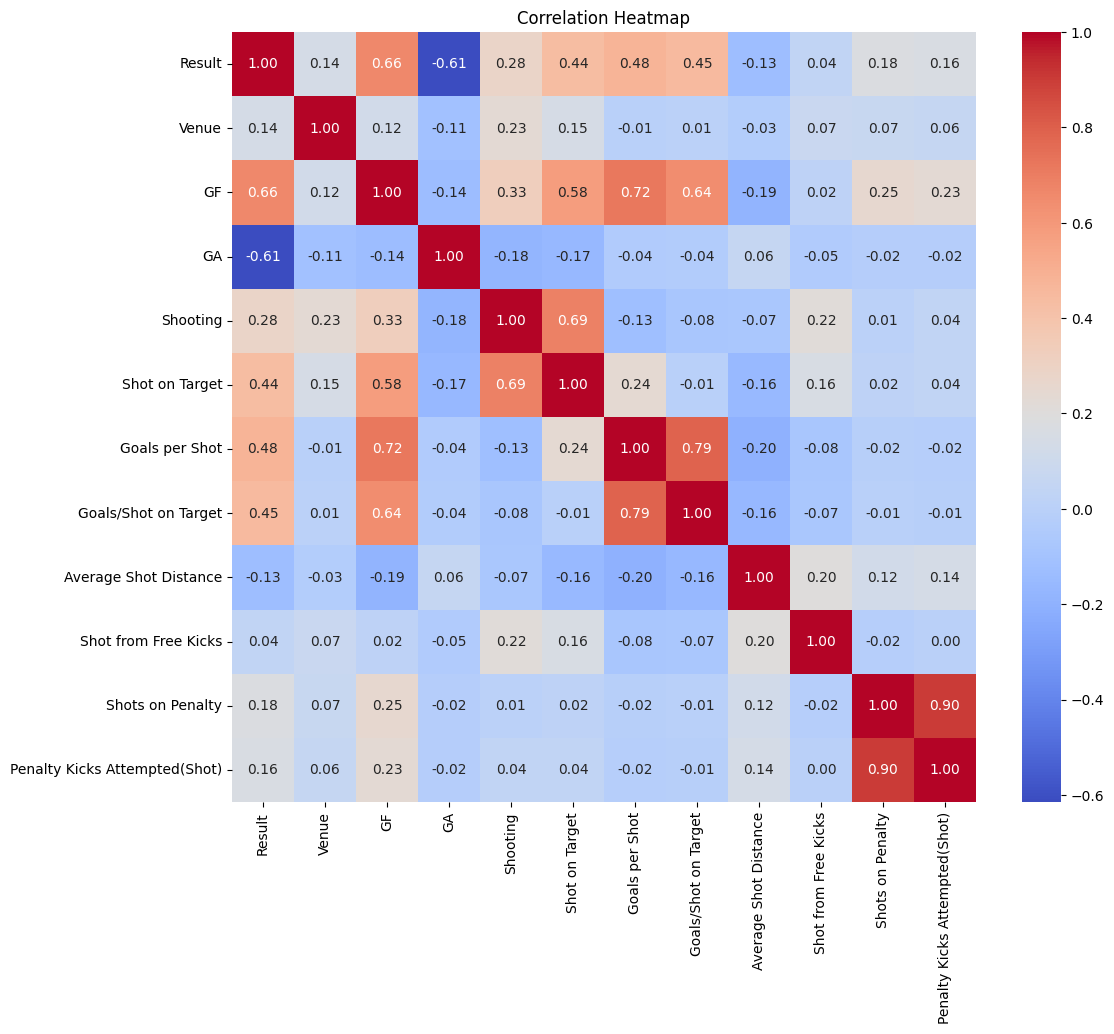

In [328]:
#슈팅과 결과의 상관 관계 그래프화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

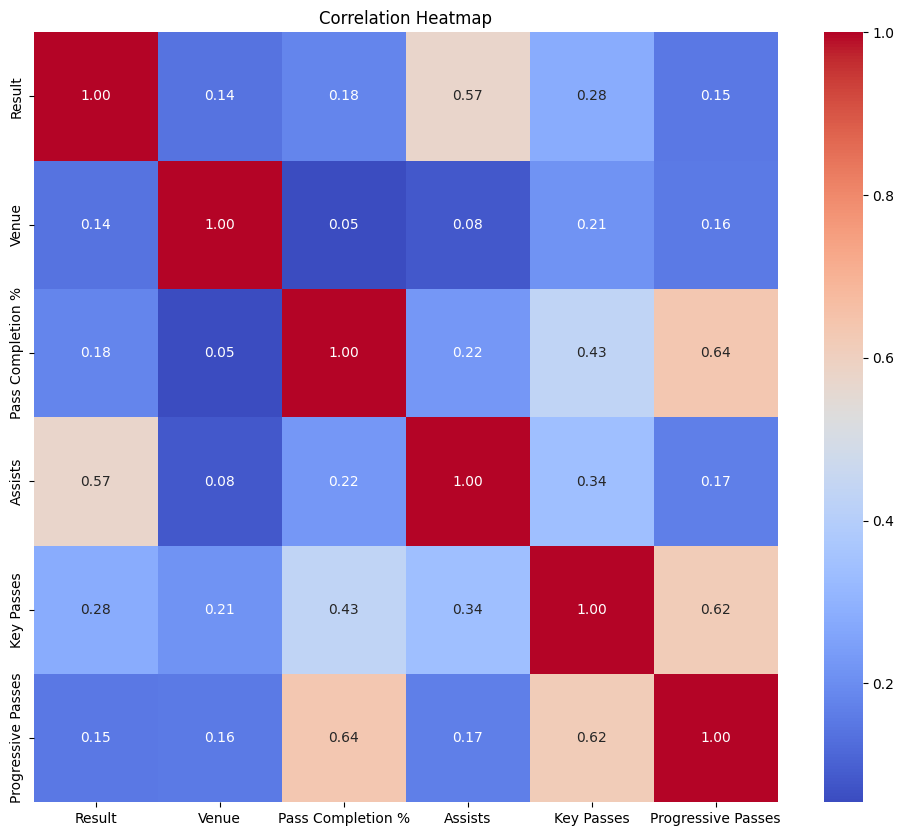

In [329]:
#패스 결과의 상관 관계 그래프화
plt.figure(figsize=(12, 10))
sns.heatmap(pass_n_assist_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

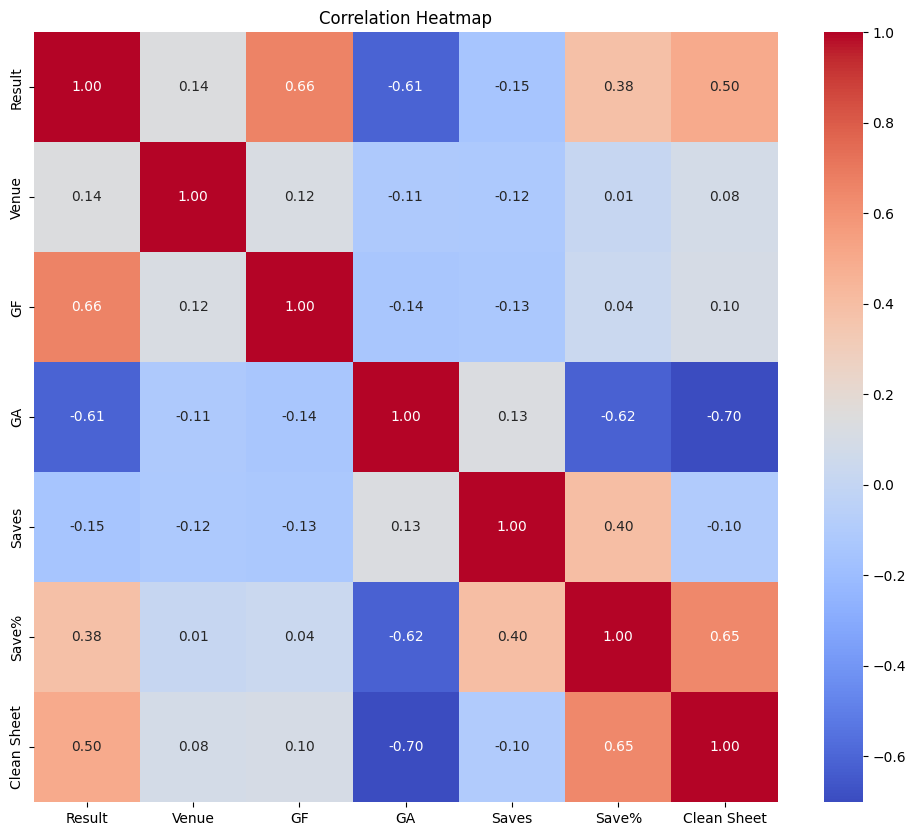

In [330]:
#골키퍼와 결과의 상관 관계 그래프화
plt.figure(figsize=(12, 10))
sns.heatmap(gk_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

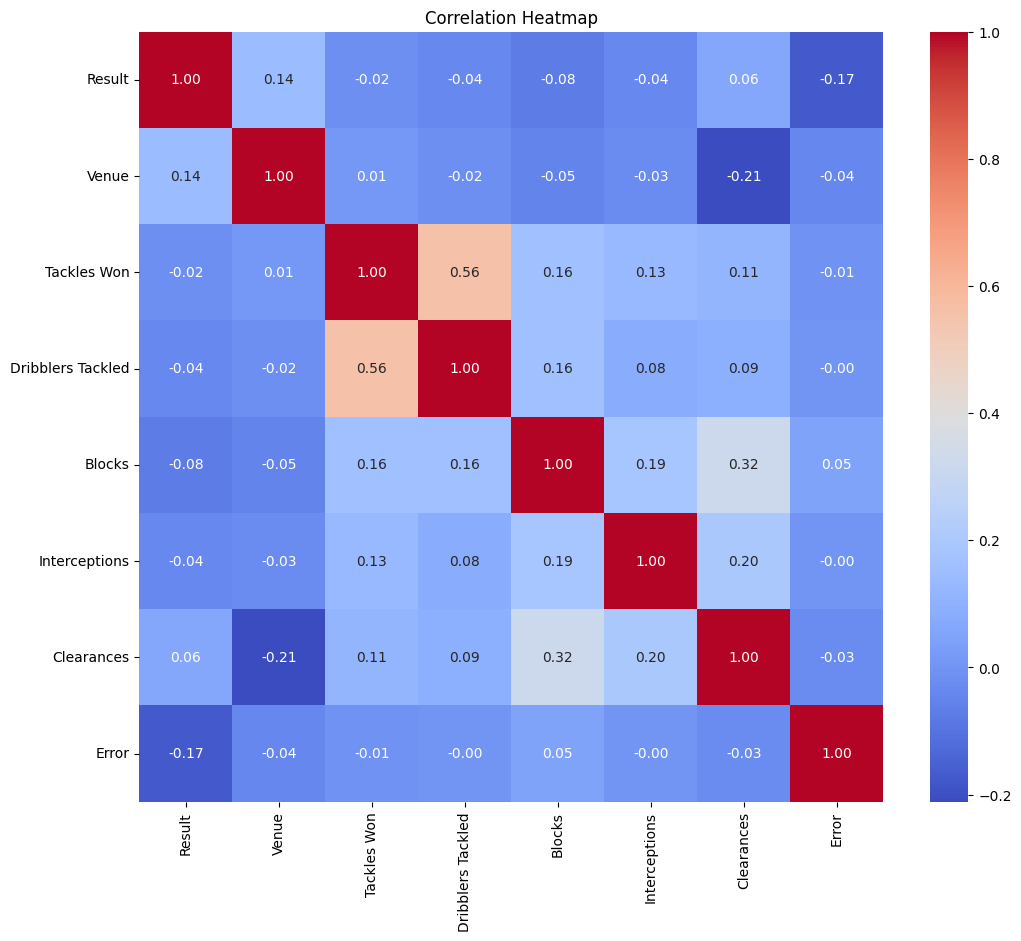

In [331]:
#수비와 결과의 상관 관계 그래프화
plt.figure(figsize=(12, 10))
sns.heatmap(defensive_stats_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [332]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 83 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Venue                                     2640 non-null   int64  
 1   Result                                    2640 non-null   int64  
 2   GF                                        2640 non-null   int64  
 3   GA                                        2640 non-null   int64  
 4   Goals                                     2640 non-null   int64  
 5   Shooting                                  2640 non-null   int64  
 6   Shot on Target                            2640 non-null   int64  
 7   Shot on Target(%)                         2639 non-null   float64
 8   Goals per Shot                            2639 non-null   float64
 9   Goals/Shot on Target                      2576 non-null   float64
 10  Average Shot Distance               

In [333]:
# '-'를 NaN으로 대체
df['np:G-xG'] = df['np:G-xG'].replace('-', np.nan)

# 데이터 타입을 실수로 변환
df['np:G-xG'] = df['np:G-xG'].astype(float).astype('float64')


# 확인
print(df['np:G-xG'].dtype)

float64


In [334]:
df2 = df2.replace('-', np.nan)

In [335]:
df['np:G-xG']

0      -0.5
1      -0.4
2       0.2
3       1.3
4       1.0
       ... 
2635   -0.4
2636   -1.3
2637   -0.4
2638    0.5
2639   -1.1
Name: np:G-xG, Length: 2640, dtype: float64

In [336]:
matrix = df2.corr()

In [342]:
matrix['Result'].sort_values()

GA                         -0.614825
Goals Against              -0.614825
Post-Shot Expected Goals   -0.501623
Shots on Target Against    -0.416816
Penalty Kicks Allowed      -0.182427
                              ...   
Clean Sheet                 0.500510
Assists                     0.571934
Goals                       0.654122
GF                          0.664263
Result                      1.000000
Name: Result, Length: 83, dtype: float64

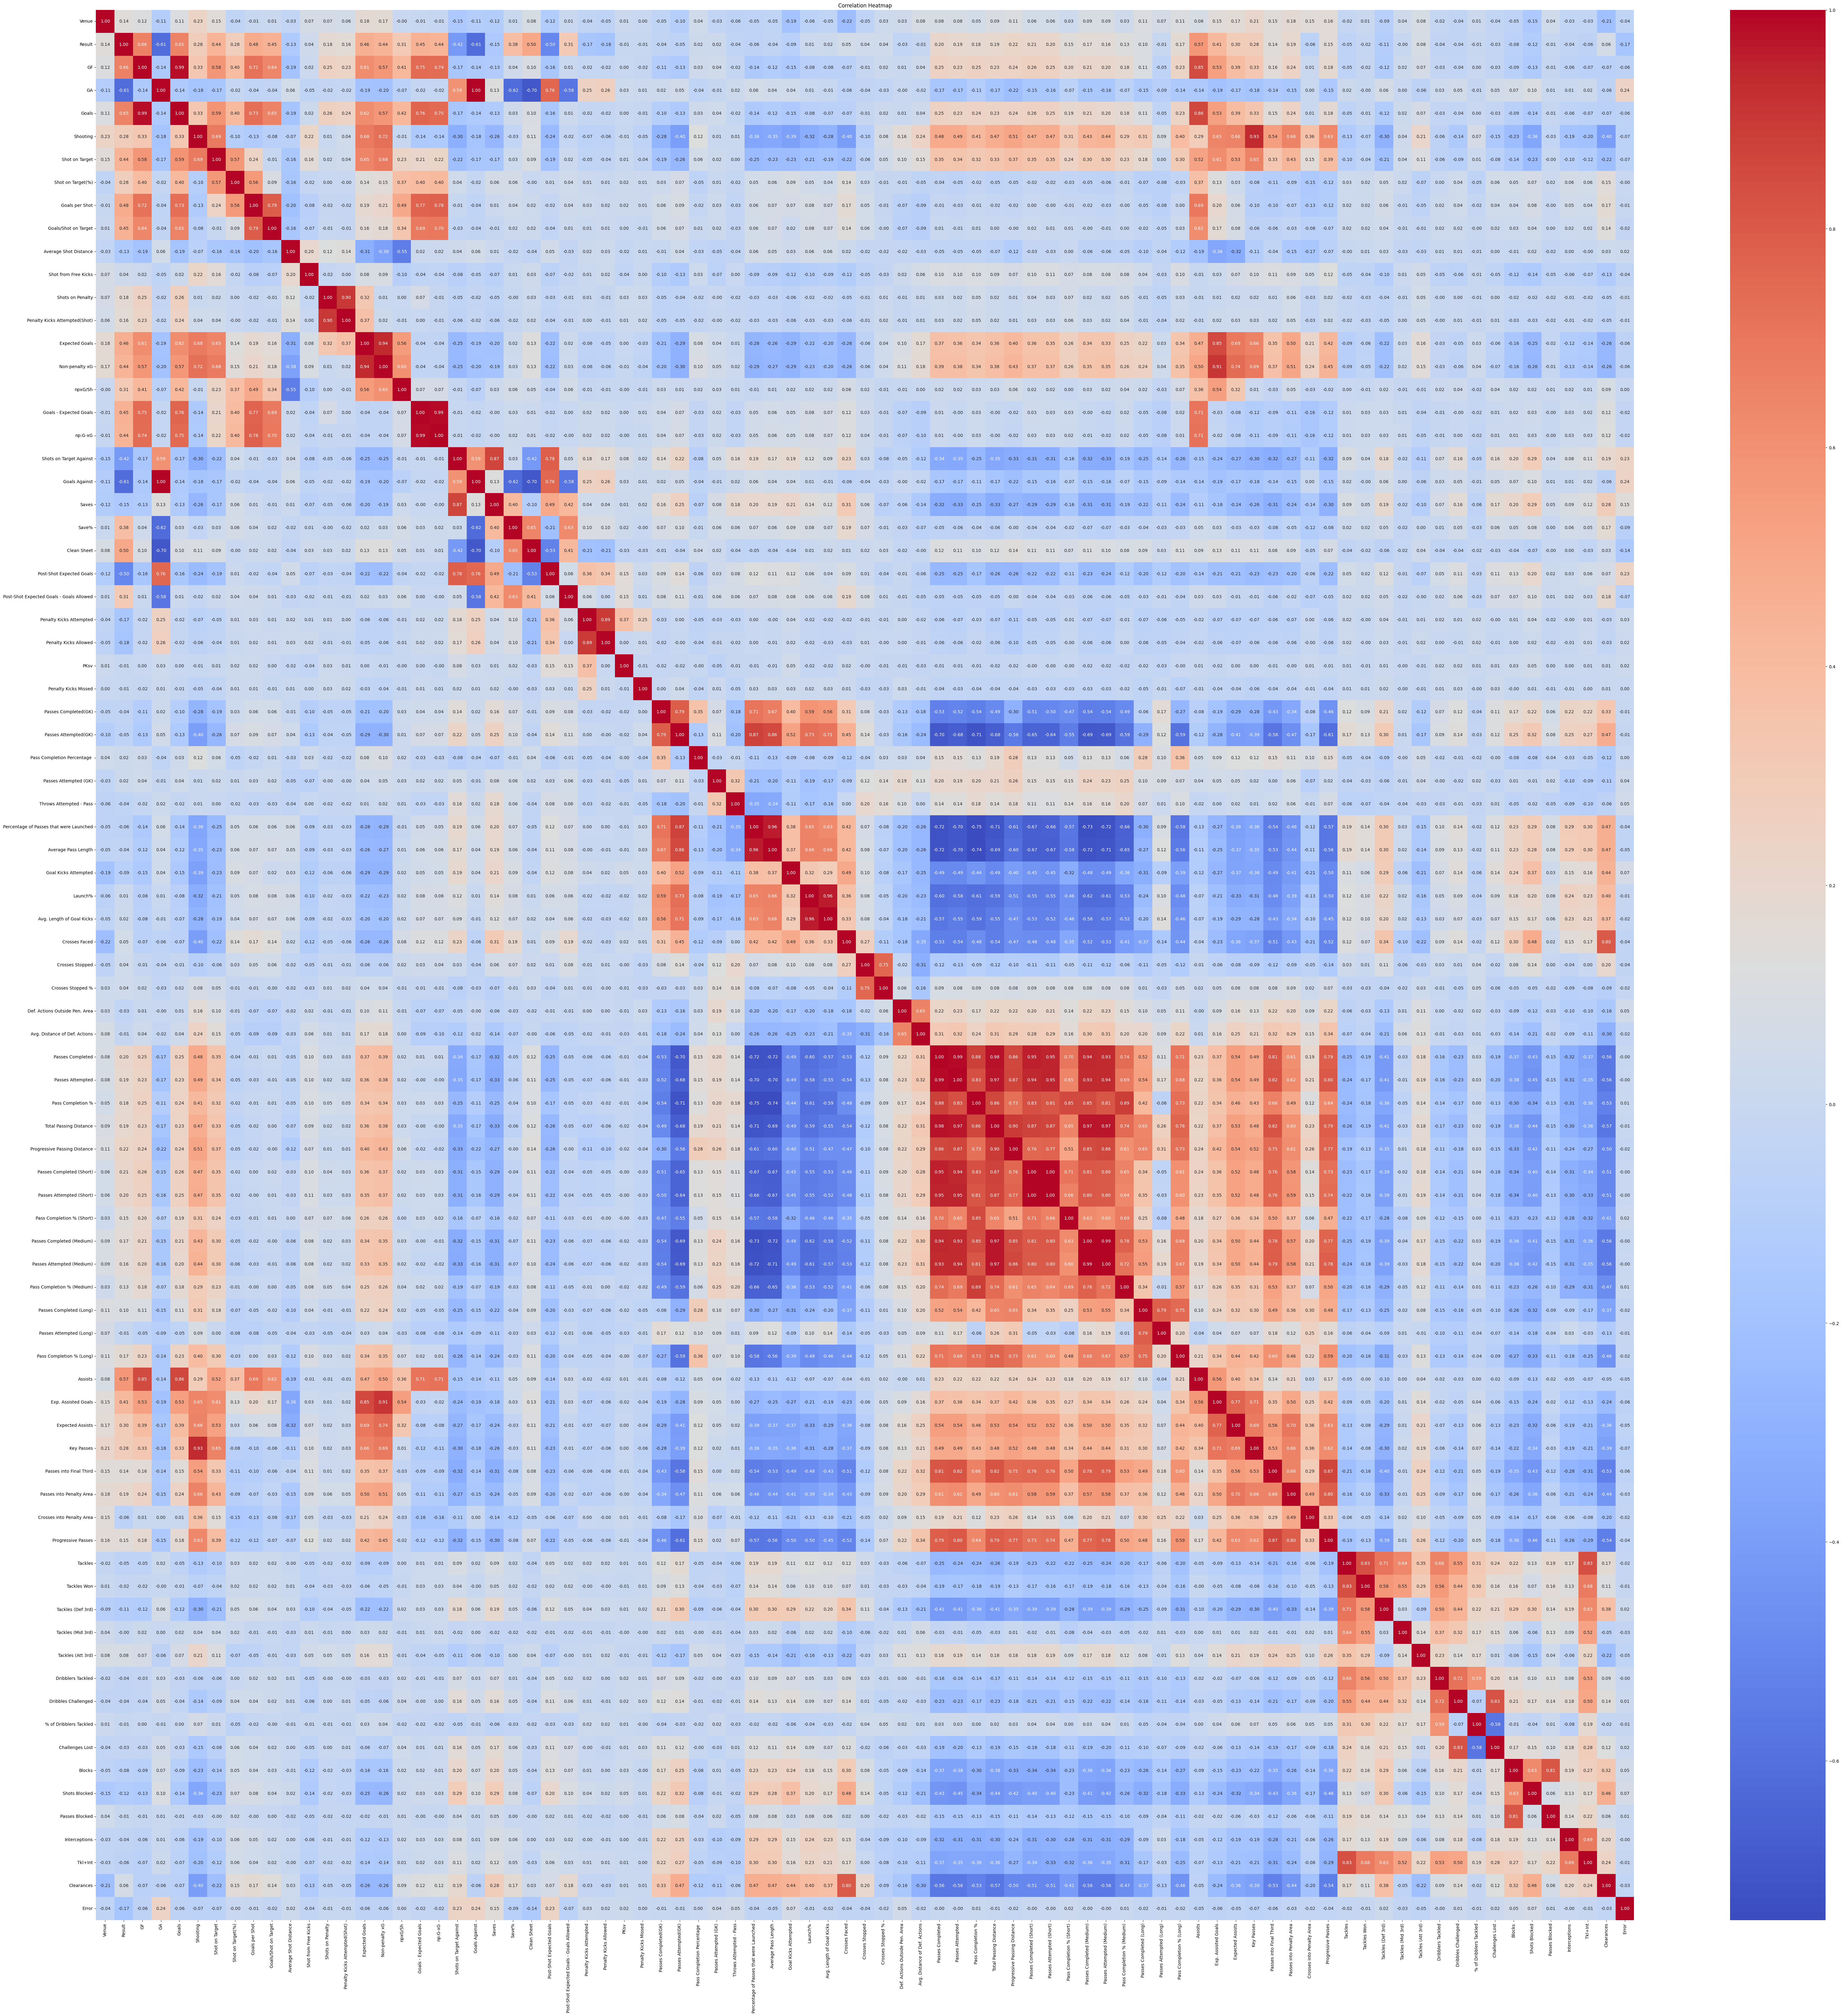

In [341]:
#결과의 상관 관계 그래프화
plt.figure(figsize=(80, 80))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()